In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape)
print(len(train_labels))
print(test_images.shape)

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)


/Users/tejpratap/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.11.0
(60000, 28, 28)
60000
(10000, 28, 28)
Epoch 1/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.4990 - acc: 0.8234
Epoch 2/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.3739 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.3381 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.3148 - acc: 0.8842 1s - loss: 0.315
Epoch 5/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.2947 - acc: 0.8922


In [2]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 64us/step
Test accuracy: 0.8735


In [14]:
predictions = model.predict(test_images)
print(predictions[0])
print("Predicted Class label = " + str(class_names[np.argmax(predictions[0])]))
print("Ground Truth Class label = " + str(class_names[test_labels[0]]))


[1.9820056e-05 6.3580120e-07 8.5413285e-06 5.7883681e-05 2.2482040e-05
 1.2984658e-03 7.5180862e-05 7.6050326e-02 6.4419862e-04 9.2182255e-01]
Predicted Class label = Ankle boot
Ground Truth Class label = Ankle boot


In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#888888")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

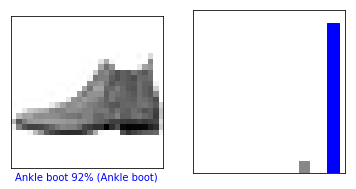

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

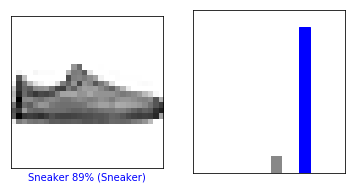

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

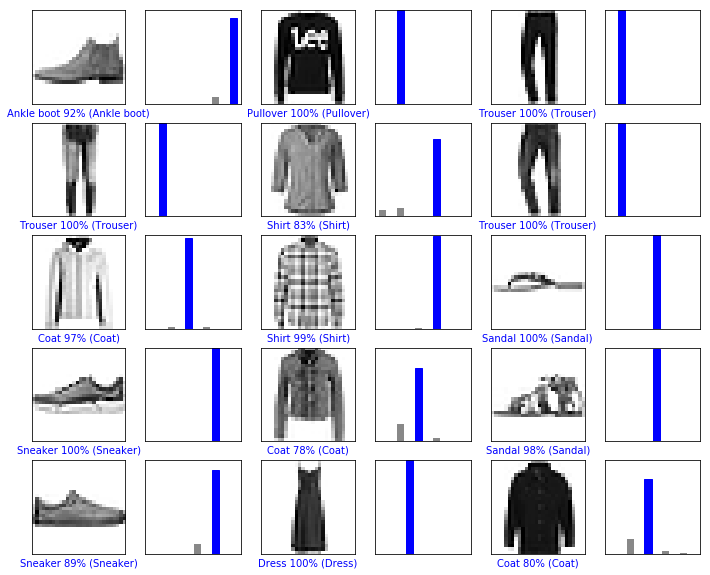

In [26]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [27]:
# Grab an image from the test dataset
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.5012773e-06 1.4602070e-10 9.9796629e-01 1.7365650e-09 1.5838742e-03
  1.8794370e-13 4.4729069e-04 7.4324521e-17 2.1769162e-08 5.8699261e-14]]


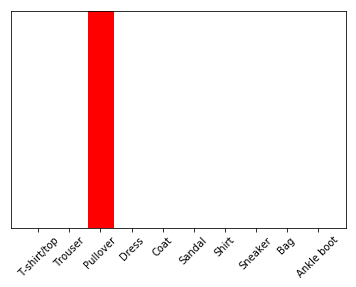

In [37]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [41]:
print('The predicted class label = ' , class_names[np.argmax(predictions_single[0])])

print('The ground truth label = ' , class_names[test_labels[1]])

The predicted class label =  Pullover
The ground truth label =  Pullover
